# K nearest neighbor

[Please use this Google colab link to run this](https://colab.research.google.com/drive/12QpjsQHoPWuWkF3HwUrqlkVw6d55Gfcc?usp=sharing)

K nearest neighbor is one of the simple and easy to use classifier. It's supervised learning.

> Birds of a feather flock together

This might be a good metaphor to understand this. 

For point A, the nearest K, you get the features, etc. And decide/predict what group it belongs to according to trained model.

The challenging part is how to determine *k*. Best bet is run many times and get the most accurate out of it.

## Demo and Implementation

This notebook tried image recognization of Cat and Dog! While searching for data, I found there are a lot of easy/short implementations of KNN in simple image recognization.

The accuracy of this model and trainning data is about 55~60%. Not very good. However, it is indeed very interesting so let's see how it goes with KNN!


I modified the code from [Kaggle](https://www.kaggle.com/code/damminhtien/dog-cat-knn-classifier) and [GitHub repo](https://github.com/beccadsouza/Robotic-Vision-Object-Classification). The repository use `opencv` to resize, I used `skimage` instead. 

I reused the image data from the repo as well. The owner used 1000+ images, I used about 400 to train the model. This is the reason that you have to run it on Google colab, because I save the images there.

I comment on most codes, you can understand easily.

In [ ]:
import os
import glob
import numpy
import cv2
from skimage import transform
from google.colab.patches import cv2_imshow

# read the image from the path, save it to a list
imagePaths = []
for img in glob.glob("/content/drive/MyDrive/Data/*.jpg"): 
    imagePaths = list(glob.glob("/content/drive/MyDrive/Data/*.jpg"))

# resize the image, or a.k.a. compress. and reshape it by flatten. It converts to 2d array.
def image_vector(image, size=(128, 128)):
    return transform.resize(image, size).flatten()

# this will used to save all the image array data
imagematrix = []

# this is the label. We used this for supervised learning
# for this demo, there are 2 labels: cat or dog
imagelabels = []

pixels = None
for (i, path) in enumerate(imagePaths):
    # load the image and extract the class label, image intensities
    image = cv2.imread(path)
    
    # the label is in image name, e.g. cat.num.jpg
    label = path.split(os.path.sep)[-1].split(".")[0]

    # get the resize image vector
    pixels = image_vector(image)

    # update the images and labels matricies respectively
    imagematrix.append(pixels)
    imagelabels.append(label)

# convert to numpy array, we use this to train KNN model
imagematrix = numpy.array(imagematrix)
imagelabels = numpy.array(imagelabels)

Right now, all the data is ready. It all parsed into `imagematrix` numpy array, the label is in `imagelabels` array.

Let's split data to 80% trainning and 20% testing. 
If better, we can use k-fold because more data means more accuracy.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(imagematrix, imagelabels, test_size=0.2, random_state=3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

model = KNeighborsClassifier(n_neighbors=35)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

         cat       0.59      0.59      0.59        39
         dog       0.62      0.62      0.62        42

    accuracy                           0.60        81
   macro avg       0.60      0.60      0.60        81
weighted avg       0.60      0.60      0.60        81



Accuracy at about 60%. It's not accurate, but at least better than flip a coin 50/50. 

Now let's use our model.

Test Case 1
Prediction by KNN - cat


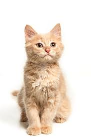

Test Case 2
Prediction by KNN - cat


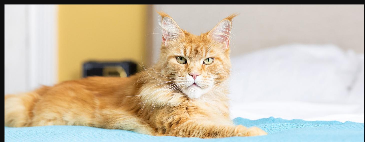

Test Case 3
Prediction by KNN - dog


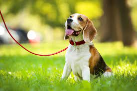

Test Case 4
Prediction by KNN - dog


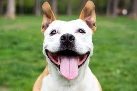

In [ ]:
for t in range(1,5):
  img = cv2.imread("/content/drive/MyDrive/Data/prod/case{0}.jpg".format(t))
  
  # convert the image just like we did before feeding data to model
  pixel = image_vector(img)
  rawImage = numpy.array([pixel])
  prediction = model.predict(rawImage)
  
  print("Test Case {0}".format(t))
  print("Prediction by KNN - {0}".format(prediction[0]))
  
  # display the image
  w, h = len(img[0]), len(img)
  if w>1000:
    w, h = w//4, h//4
  else:
    w, h = w//2, h//2
  cv2_imshow(cv2.resize(img,(w,h)))

As accuracy report stated, accuracy is not high. We got lucky that this works on the test cases.

This seems magic, but think again: I passed `35` to the model, so whenever a new image is fed to the model, the model will use the KNN algorithm and find the *closet 35 pictures* to predict what kind of pet it is.

You can reduce the `K` number. I used 35 here because it's the highest accurated number I can get from my attemps.

## Believe it or not, with proper marketing, this model is good enough to attract people!

# What kind of character are you??? Try it out!

Prediction by KNN - cat

        A cat person!
        You are creative! You're open to new things and usually unexpected!
    


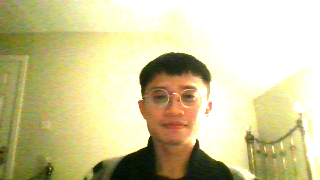

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Data/prod/case5.jpg".format(t))
pixel = image_vector(img)
rawImage = numpy.array([pixel])
prediction = model.predict(rawImage)
print("Prediction by KNN - {0}".format(prediction[0]))

if prediction[0] == 'dog':
    print("""
        Dog person!
        You are kind and sociable!
        You have positive personality, and are willing to take the responsibility!
    """)
else:
    print("""
        A cat person!
        You are creative! You're open to new things and usually unexpected!
    """)

w, h = len(img[0]), len(img)

if w>1000:
    w, h = w//4, h//4
else:
    w, h = w//2, h//2
cv2_imshow(cv2.resize(img,(w,h)))